<div style="line-height:1.2;">

<h1 style="color:#0AE42F; margin-bottom: 0.2em;">FP-growth</h1>

<h4 style="margin-top: 0.2em; margin-bottom: 0.5em;">Frequent Pattern growth example.</h4>

</div>

<div style="margin-top: 5px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline; margin-bottom: 0;">Keywords:</h3> association_rules + TransactionEncoder + mlxtend apriori 
</span>
</div>

<div style="margin-top: 5px;">
<span style="display: inline-block;">
    <h3 style="color: red; display: inline; margin-bottom: 0;">Notes:</h3> The dataset "OnlineRetail.csv" was not uploaded to avoid uploading a big file.
</span>
</div>


<h3 style="color:#0AE42F "> Recap:  </h3>
<div style="margin-top: -8px;">
Frequent Pattern growth is an efficient improved version of the Apriori Algorithm which is widely used for frequent pattern mining. <br>
Unlike Apriori which generates candidate itemsets, this kind of Association Rule Mining is used as an analytical process that finds frequent patterns or associations from data sets. <br> It uses method called pattern fragment growth.   

In [54]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori
import matplotlib.pyplot as plt

In [30]:
dataset_shop = pd.read_csv('./data_to_use/OnlineRetail.csv', encoding='iso-8859-1') #default utf-8 does not work
dataset_shop

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [31]:
len(dataset_shop)

541909

In [32]:
dataset_shop.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
te = TransactionEncoder()
te_array = te.fit(dataset_shop).transform(dataset_shop)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,C,D,I,N,P,Q,S,U,a,c,...,m,n,o,p,r,s,t,u,v,y
0,False,False,True,True,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,True,True,False,True
4,False,True,True,False,False,False,False,False,True,True,...,False,True,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
%%script echo skipping... 
""" ValueError: The input DataFrame `df` containing the frequent itemsets is empty.
did not find any frequent itemsets above the minimum support threshold."""
frequent_itemsets_fp = fpgrowth(df, min_support=0.1, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.1)

skipping...


In [43]:
# Movies dataset with 10 transactions and 30 movies
movies = ['Avatar', 'Titanic', 'Inception', 'Interstellar', 
        'The Dark Knight', 'Star Wars', 'Lord of the Rings',
        'Harry Potter 1', 'Harry Potter 2', 'Joker', 
        'Frozen', 'Toy Story', 'Coco', 'Up', 'Finding Nemo',
        'The Lion King', 'Aladdin', 'Beauty and the Beast',
        'Iron Man', 'Captain America', 'Aquaman', 'Wonder Woman',
        'Black Panther', 'Thor', 'Ant-Man', 'Spider-Man', 
        'Justice League', 'Shrek', 'The Incredibles', 'How to Train Your Dragon']

transactions = [
    ['Avatar', 'Titanic', 'Inception'],
    ['Interstellar', 'The Dark Knight'], 
    ['Star Wars', 'Lord of the Rings', 'Harry Potter 1'],
    ['Harry Potter 2', 'Joker', 'Frozen'],
    ['Toy Story', 'Coco', 'Finding Nemo'],
    ['The Lion King', 'Aladdin', 'Beauty and the Beast'],
    ['Iron Man', 'Captain America', 'Aquaman'], 
    ['Wonder Woman', 'Black Panther', 'Thor'],
    ['Ant-Man', 'Spider-Man', 'Justice League'],
    ['Shrek', 'The Incredibles', 'How to Train Your Dragon']
]

""" Transposes the list of transactions.
Converts a list of lists where each inner list represents a transaction into a list of lists,
where each inner list represents items
"""
transactions = list(map(list, zip(*transactions))) 

dataset = pd.DataFrame(transactions) #not used!
print(dataset)

         0                1                  2               3          4  \
0   Avatar     Interstellar          Star Wars  Harry Potter 2  Toy Story   
1  Titanic  The Dark Knight  Lord of the Rings           Joker       Coco   

               5                6              7           8                9  
0  The Lion King         Iron Man   Wonder Woman     Ant-Man            Shrek  
1        Aladdin  Captain America  Black Panther  Spider-Man  The Incredibles  


In [45]:
# Create TransactionEncoder object to convert the transaction data into a format that can be used for frequent itemset mining.
te = TransactionEncoder()

""" Fit the transaction encoder to the transposed transactions and transforms the transactions into a binary format. 
Each row of te_array represents a transaction, and each column represents an item 
(from the unique set of items across all transactions). 
If an item is present in a transaction, its corresponding value in the binary matrix is set to True; 
otherwise, it's set to False.
"""
te_array = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_array, columns=te.columns_)
df

,Aladdin,Ant-Man,Avatar,Black Panther,Captain America,Coco,Harry Potter 2,Interstellar,Iron Man,Joker,Lord of the Rings,Shrek,Spider-Man,Star Wars,The Dark Knight,The Incredibles,The Lion King,Titanic,Toy Story,Wonder Woman
0,False,True,True,False,False,False,True,True,True,False,False,True,False,True,False,False,True,False,True,True
1,True,False,False,True,True,True,False,False,False,True,True,False,True,False,True,True,False,True,False,False


In [71]:
""" Apply FP-Growth to the DataFrame to mine frequent itemsets.
    The min_support parameter specifies the minimum support threshold, 
    which determines how frequently an itemset must appear in the transactions to be considered "frequent" 
    The use_colnames parameter ensures that the item names are used as column names in the resulting itemset DataFrame.
"""
frequent_itemsets_fp = fpgrowth(df, min_support=0.5, use_colnames=True)

<h4 style="color:#0AE42F "> Generate the "association" rules from the frequent itemsets, <br> to identify interesting relationships between items based on their appearance in the transactions. <br></h4>
<div style="margin-top: -12px;">

- The 'metric' parameter specifies the metric to be used for rule evaluation (in this case, "confidence").      
- The 'min_threshold' parameter sets the minimum threshold for the chosen metric.     
</div>
<div style="margin-top: -2px;">
1 . Available parameters:

+ min_threshold: Specifies the minimum threshold for the chosen metric. Rules with a metric value below this threshold will be filtered out.
+ support_only: When set to True, only the support metric will be calculated. If False, additional metrics specified by the metric <br> parameter will also be calculated.
+ threshold_type: Determines whether the min_threshold value is applied to absolute metric values or relative to the maximum metric <br> value calculated for each rule.
+ max_k: If threshold_type is set to "max_k", this parameter specifies the maximum number of rules to return based on the specified metric.
+ sort: If True, the resulting DataFrame of association rules will be sorted based on the specified metric.
</div>
<br>
<div style="margin-top: -10px;">
2 . Available metrics:

+ "support": The proportion of transactions that contain both the antecedent and the consequent (support of the rule).
+ "confidence": The conditional probability that a transaction contains the consequent given that it contains the antecedent.
+ "lift": The ratio of the observed support to the expected support if the antecedent and consequent were independent.
+ "leverage": The difference between the observed support and the expected support if the antecedent and consequent were independent.
+ "conviction": Measures the dependence of the consequent on the antecedent, taking into account the independence <br> of antecedent and consequent in non-occurrence.
</div>

In [68]:
# Asssociation rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [69]:
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Wonder Woman),(Toy Story),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
1,(Toy Story),(Wonder Woman),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
2,(Ant-Man),(Toy Story),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
3,(Toy Story),(Ant-Man),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
4,(Wonder Woman),(Ant-Man),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
113999,(Titanic),"(Captain America, Lord of the Rings, Black Pan...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
114000,(Joker),"(Captain America, Lord of the Rings, Black Pan...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
114001,(The Dark Knight),"(Captain America, Lord of the Rings, Black Pan...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
114002,(Spider-Man),"(Captain America, Lord of the Rings, Black Pan...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0


Text(0, 0.5, 'Count')

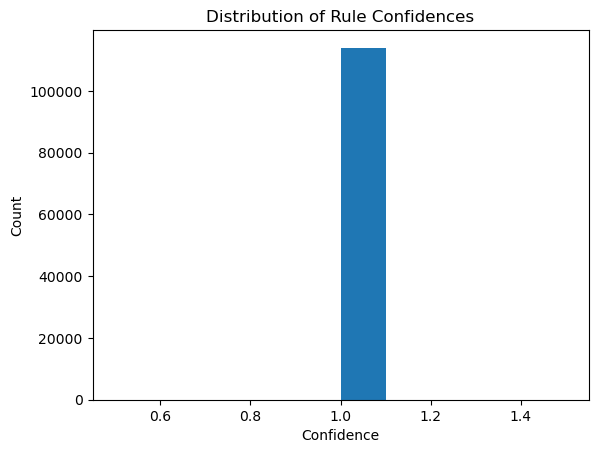

In [70]:
confidences = list(rules_fp["confidence"])

# Plot histogram of confidences
plt.hist(confidences)
plt.title('Distribution of Rule Confidences')
plt.xlabel('Confidence')
plt.ylabel('Count')

In [76]:
new_transactions = [
    ['Avatar', 'Titanic', 'Inception', 'Interstellar', 'Star Wars'],
    ['The Dark Knight', 'Joker', 'Frozen', 'Toy Story', 'Finding Nemo'],
    ['Lord of the Rings', 'Harry Potter 1', 'Harry Potter 2', 'Fantastic Beasts'],
    ['Coco', 'Onward', 'Inside Out', 'The Incredibles', 'Brave'],
    ['The Lion King', 'Aladdin', 'Beauty and the Beast', 'Mulan', 'Tangled'],
    ['Iron Man', 'Captain America', 'Avengers', 'Black Panther', 'Thor'],
    ['Wonder Woman', 'Aquaman', 'Shazam', 'Justice League', 'Batman'],
    ['Spider-Man', 'Ant-Man', 'Doctor Strange', 'Guardians of Galaxy', 'Black Widow'],
    ['How to Train Your Dragon', 'Kung Fu Panda', 'Shrek', 'Madagascar', 'Home'],
    ['Toy Story', 'Monsters Inc', 'Cars', 'The Incredibles', 'Up'],
    ['Frozen', 'Tangled', 'Moana', 'Zootopia', 'Big Hero 6'],
    ['The Jungle Book', 'The Lion King', '101 Dalmations', 'Dumbo', 'Bambi'],
    ['Star Wars', 'Indiana Jones', 'Jurassic Park', 'Inception', 'The Matrix'],
    ['Back to the Future', 'E.T.', 'Ghostbusters', 'The Goonies', 'Ferris Bueller'],
    ['The Dark Knight', 'The Silence of the Lambs', 'Se7en', 'Pulp Fiction', 'Fight Club'],
]

In [79]:
#transactions += new_transactions
transactions = new_transactions


In [85]:
te = TransactionEncoder() 
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,101 Dalmations,Aladdin,Ant-Man,Aquaman,Avatar,Avengers,Back to the Future,Bambi,Batman,Beauty and the Beast,...,The Jungle Book,The Lion King,The Matrix,The Silence of the Lambs,Thor,Titanic,Toy Story,Up,Wonder Woman,Zootopia
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [91]:
frequent_itemsets_fp = fpgrowth(df, min_support=0.1, use_colnames=True)

In [92]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.1)

In [51]:
""" Compare with the mlxtend Apriori algorithm. """

# Perform frequent itemset mining using Apriori
frequent_itemsets_ap = apriori(df, min_support=0.3, use_colnames=True)

# Generate association rules from the frequent itemsets using a certain metric and threshold
rules_ap = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)

# Print the generated association rules from Apriori
print("Association rules from Apriori:")
rules_ap

Association rules from Apriori:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Black Panther),(Aladdin),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
1,(Aladdin),(Black Panther),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
2,(Captain America),(Aladdin),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
3,(Aladdin),(Captain America),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
4,(Aladdin),(Coco),0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
113999,(Interstellar),"(Iron Man, Toy Story, Wonder Woman, Ant-Man, T...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
114000,(Star Wars),"(Iron Man, Toy Story, Wonder Woman, Ant-Man, T...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
114001,(Shrek),"(Iron Man, Toy Story, Wonder Woman, Ant-Man, T...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
114002,(Harry Potter 2),"(Iron Man, Toy Story, Wonder Woman, Ant-Man, T...",0.5,0.5,0.5,1.0,2.0,0.25,inf,1.0
